In [34]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=b9f0bc7b67b74c67e6c491c9c9df5d135153fefcf7a38f20a33bd1d3c0c29dd0
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [36]:
# Moving Averages (SMA, EMA)
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Download historical data for a stock
symbol = 'AAPL'  # Example stock symbol
start_date = '2020-01-01'
end_date = '2024-11-01'
data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [37]:
# Calculate SMAs
short_window = 20
long_window = 50
data['SMA20'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['SMA50'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

# Calculate EMAs
data['EMA20'] = data['Close'].ewm(span=short_window, adjust=False).mean()
data['EMA50'] = data['Close'].ewm(span=long_window, adjust=False).mean()

In [38]:
# Detect SMA Crossovers
data['SMA_Cross_Up'] = (data['SMA20'] > data['SMA50']) & (data['SMA20'].shift(1) < data['SMA50'].shift(1))
data['SMA_Cross_Down'] = (data['SMA20'] < data['SMA50']) & (data['SMA20'].shift(1) > data['SMA50'].shift(1))

# Detect EMA Crossovers
data['EMA_Cross_Up'] = (data['EMA20'] > data['EMA50']) & (data['EMA20'].shift(1) < data['EMA50'].shift(1))
data['EMA_Cross_Down'] = (data['EMA20'] < data['EMA50']) & (data['EMA20'].shift(1) > data['EMA50'].shift(1))

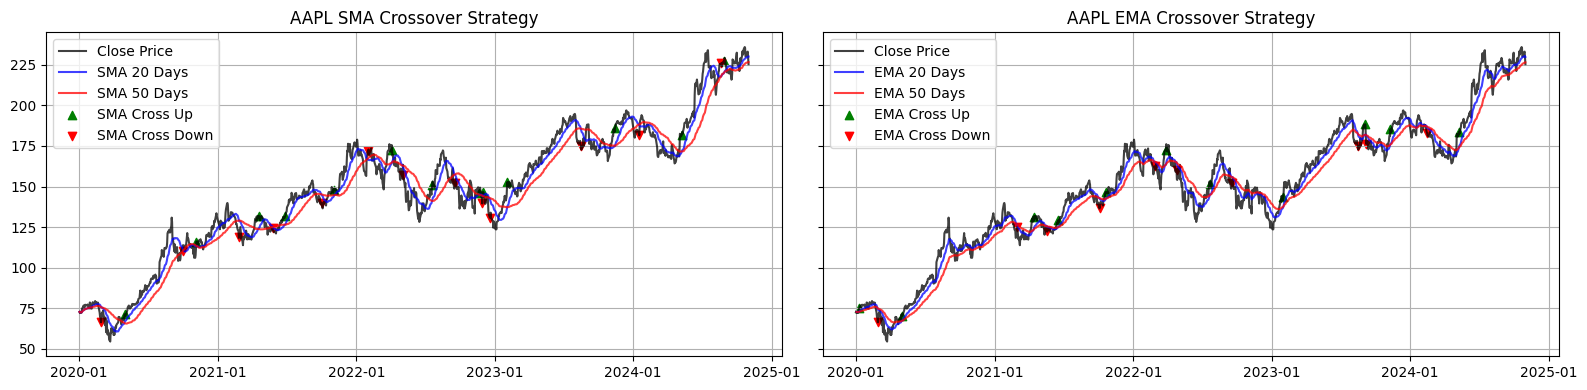

In [39]:
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(16, 4), sharex=True, sharey=True)

# Configure date formatting
for ax in axs:
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# SMA Plot
axs[0].plot(data.index, data['Close'], label='Close Price', color='black', alpha=0.75)
axs[0].plot(data.index, data['SMA20'], label='SMA 20 Days', color='blue', alpha=0.75)
axs[0].plot(data.index, data['SMA50'], label='SMA 50 Days', color='red', alpha=0.75)
axs[0].scatter(data.index[data['SMA_Cross_Up']], data['Close'][data['SMA_Cross_Up']], label='SMA Cross Up', color='green', marker='^')
axs[0].scatter(data.index[data['SMA_Cross_Down']], data['Close'][data['SMA_Cross_Down']], label='SMA Cross Down', color='red', marker='v')
axs[0].set_title(f'{symbol} SMA Crossover Strategy')
axs[0].legend()
axs[0].grid()

# EMA Plot
axs[1].plot(data.index, data['Close'], label='Close Price', color='black', alpha=0.75)
axs[1].plot(data.index, data['EMA20'], label='EMA 20 Days', color='blue', alpha=0.75)
axs[1].plot(data.index, data['EMA50'], label='EMA 50 Days', color='red', alpha=0.75)
axs[1].scatter(data.index[data['EMA_Cross_Up']], data['Close'][data['EMA_Cross_Up']], label='EMA Cross Up', color='green', marker='^')
axs[1].scatter(data.index[data['EMA_Cross_Down']], data['Close'][data['EMA_Cross_Down']], label='EMA Cross Down', color='red', marker='v')
axs[1].set_title(f'{symbol} EMA Crossover Strategy')
axs[1].legend()
axs[1].grid()

# Improve layout and plot
plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed

Plotting MACD for AAPL


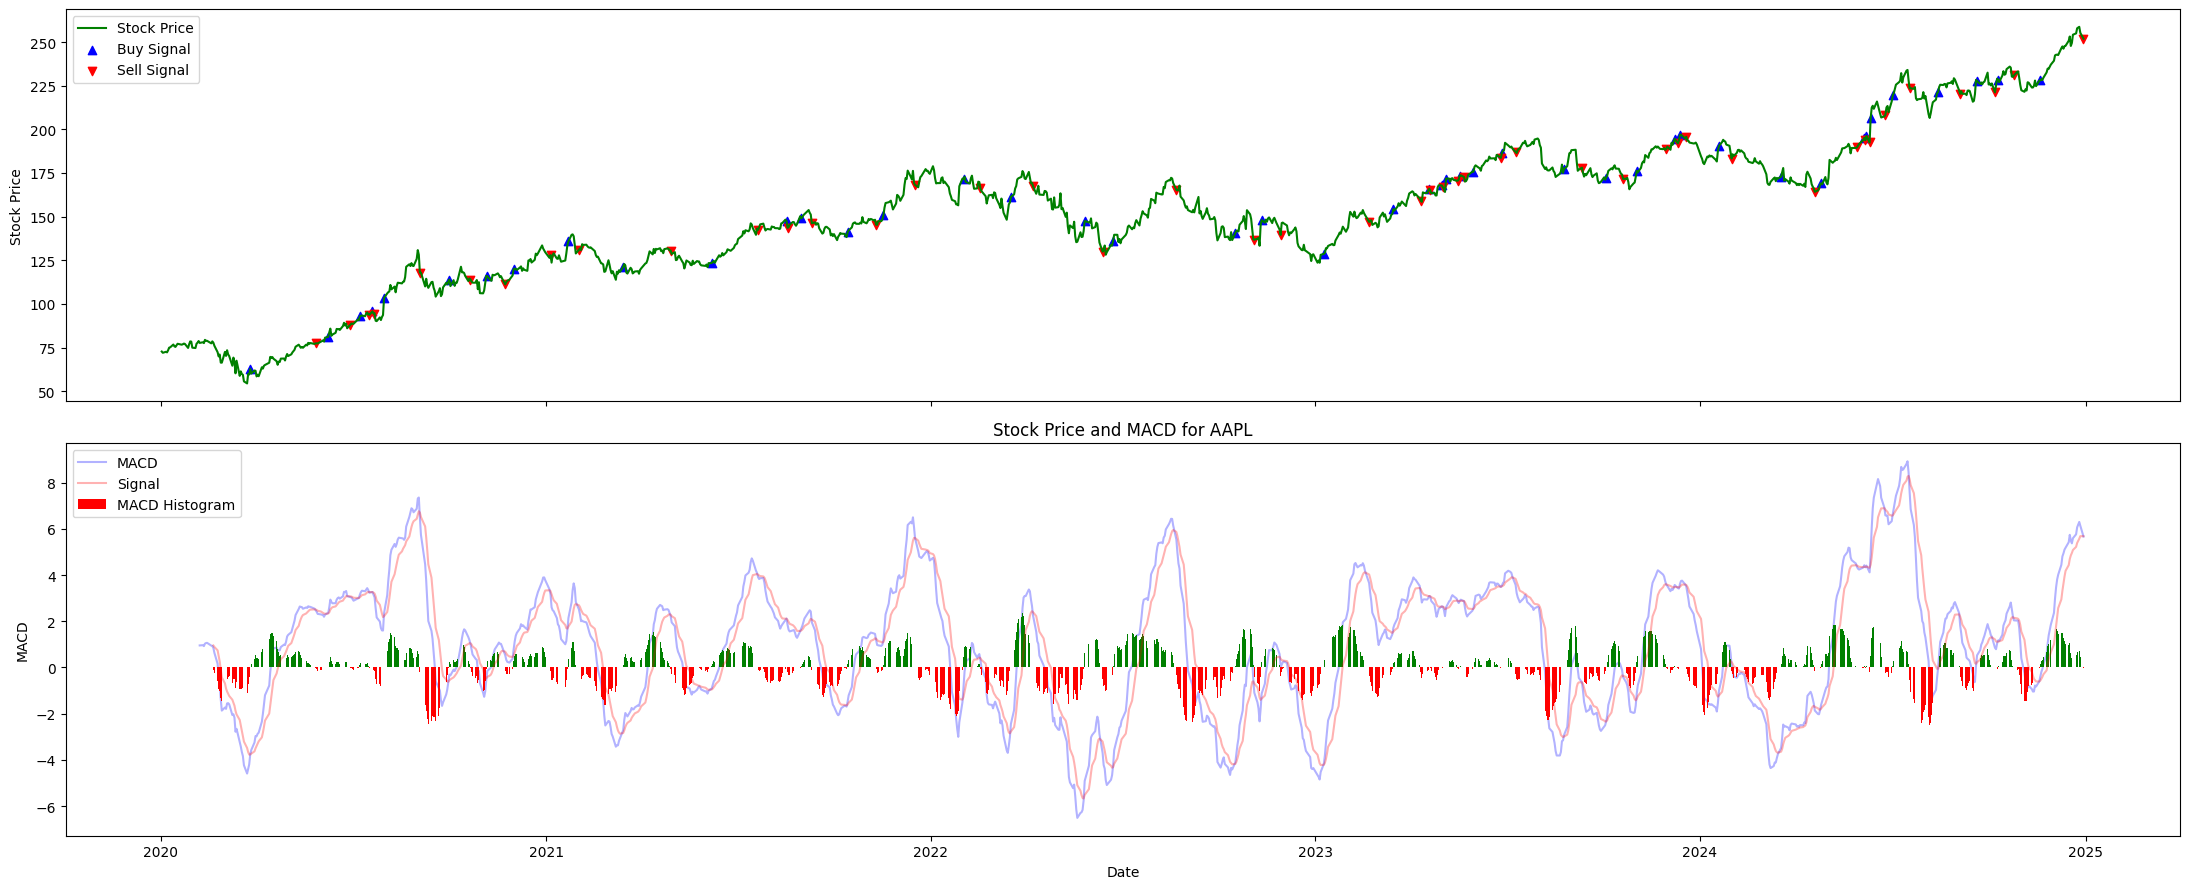

Plotting MACD for IOC.NS


[*********************100%***********************]  1 of 1 completed


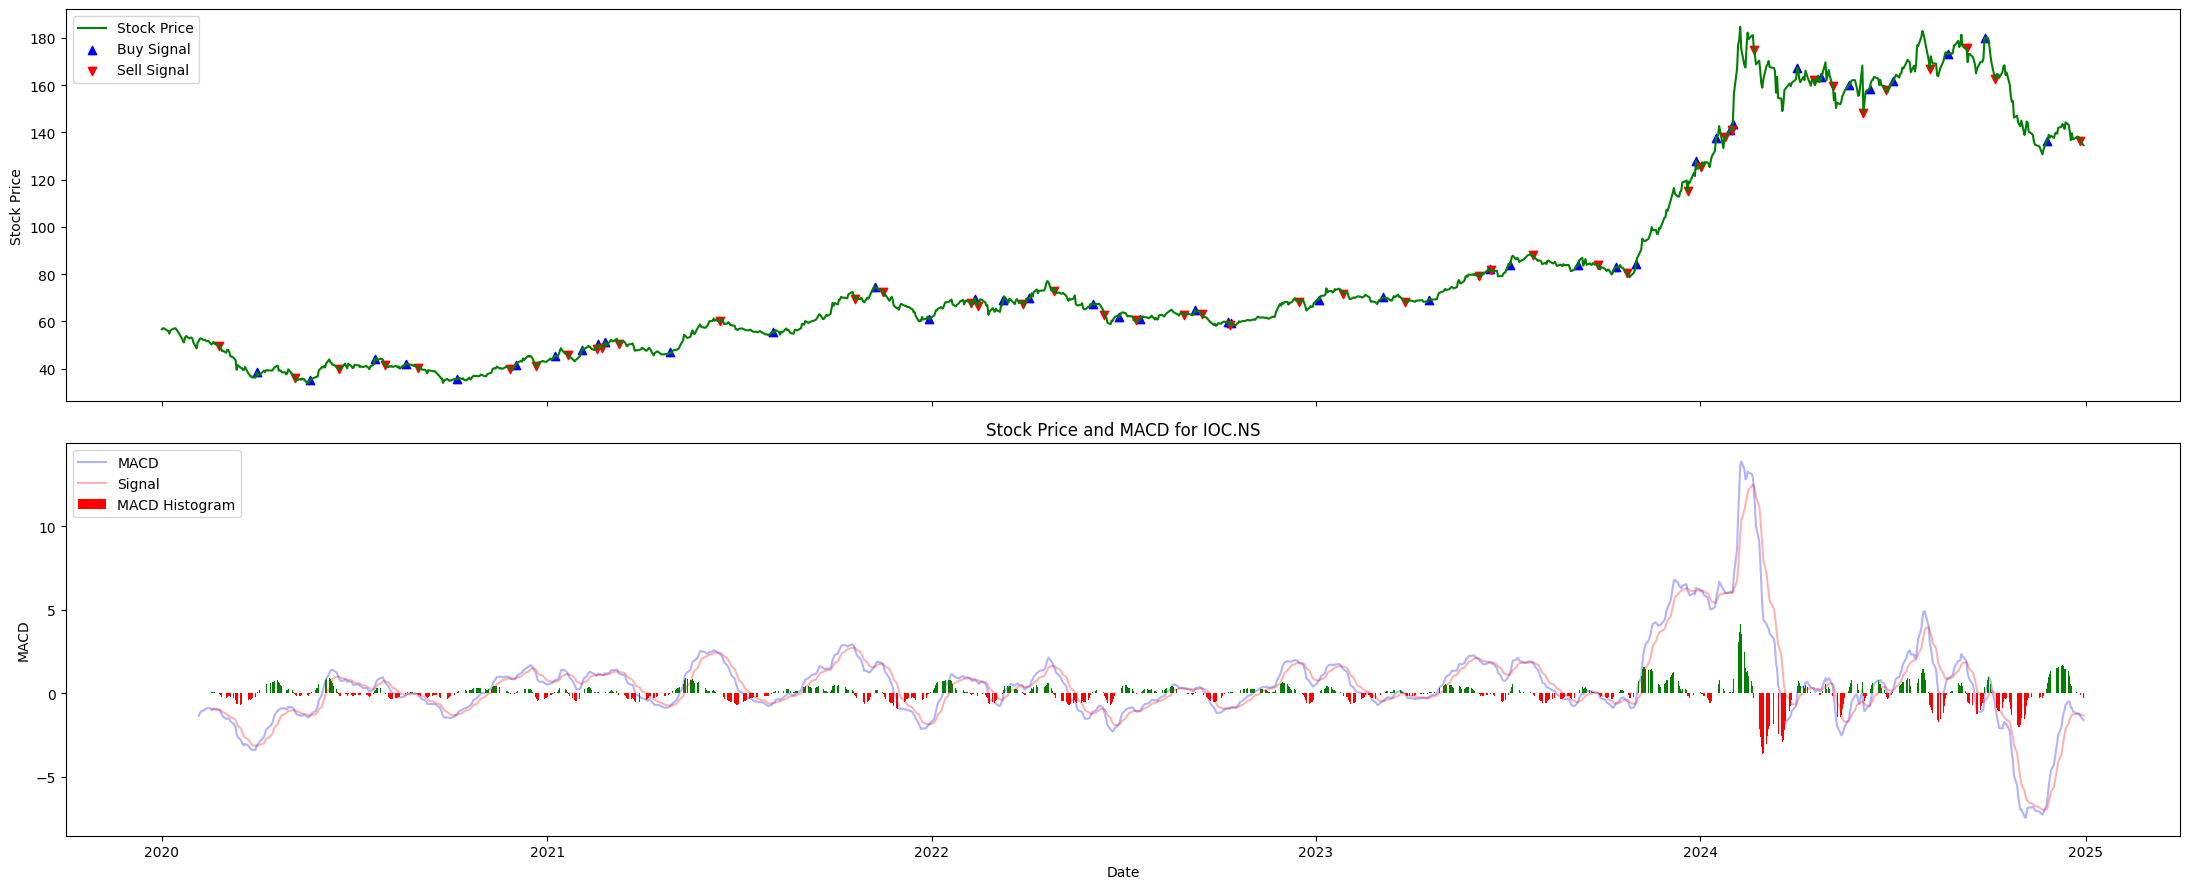

In [45]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from ta.trend import MACD

# Function to plot MACD signals
def plot_macd_signals(ticker, start_date, end_date):
    # Fetch stock data
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    if stock_data.empty:
        print(f"Warning: No data found for {ticker}. Skipping...")
        return

    prices = stock_data['Close'].squeeze()  # Ensure it's a 1D Series

    # Calculate MACD
    macd_indicator = MACD(prices)
    macd_line = macd_indicator.macd()
    signal_line = macd_indicator.macd_signal()
    macd_histogram = macd_indicator.macd_diff()

    # Detect buy/sell signals
    buy_signals = (macd_line > signal_line) & (macd_line.shift(1) <= signal_line.shift(1))
    sell_signals = (macd_line < signal_line) & (macd_line.shift(1) >= signal_line.shift(1))

    # Plotting
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 9), sharex=True)

    # Plot stock price with buy/sell signals
    ax1.plot(prices.index, prices, color='g', label='Stock Price', zorder=3)
    ax1.scatter(prices.index[buy_signals], prices[buy_signals], marker='^', color='b', label='Buy Signal')
    ax1.scatter(prices.index[sell_signals], prices[sell_signals], marker='v', color='r', label='Sell Signal')
    ax1.set_ylabel('Stock Price')
    ax1.legend(loc='upper left')

    # Plot MACD, Signal Line, and Histogram
    ax2.plot(prices.index, macd_line, label='MACD', color='b', alpha=0.3, zorder=1)
    ax2.plot(prices.index, signal_line, label='Signal', color='r', alpha=0.3, zorder=2)
    ax2.bar(prices.index, macd_histogram, label='MACD Histogram', color=np.where(macd_histogram > 0, 'g', 'r'))
    ax2.set_ylabel('MACD')
    ax2.legend(loc='upper left')

    plt.title(f'Stock Price and MACD for {ticker}')
    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()

# Example usage
tickers = ["AAPL", "IOC.NS"]
start_date = "2020-01-01"
end_date = "2024-12-31"

for ticker in tickers:
    print(f"Plotting MACD for {ticker}")
    plot_macd_signals(ticker, start_date, end_date)


[*********************100%***********************]  1 of 1 completed


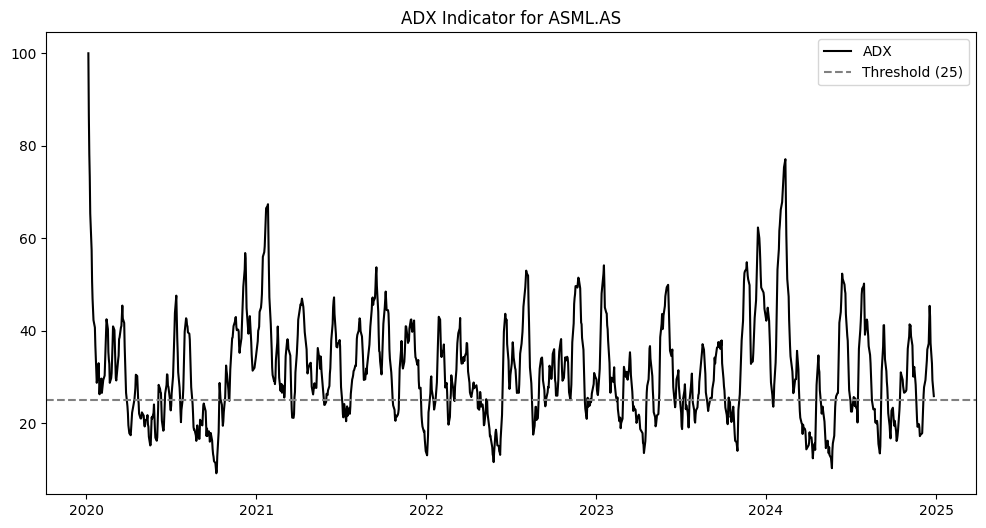

Price            Close        ADX        +DI        -DI signal
Ticker         ASML.AS                                        
Date                                                          
2024-12-12  681.822571  33.575536  25.344146   9.638244      1
2024-12-13  686.213074  35.938646  27.560167   8.871260      1
2024-12-16  686.512451  37.244042  25.040542   9.325332      1
2024-12-17  701.879150  41.275127  36.824998   7.151139      1
2024-12-18  715.749084  45.385202  37.499830   6.079112      1
2024-12-19  689.306396  43.070604  29.261939  16.450656      1
2024-12-20  684.616516  37.341776  24.975364  25.027562     -1
2024-12-23  682.321533  32.909270  24.941470  22.977747      1
2024-12-24  687.011353  29.306535  24.435365  21.717532      1
2024-12-27  683.419189  25.855274  25.218245  23.549381      1


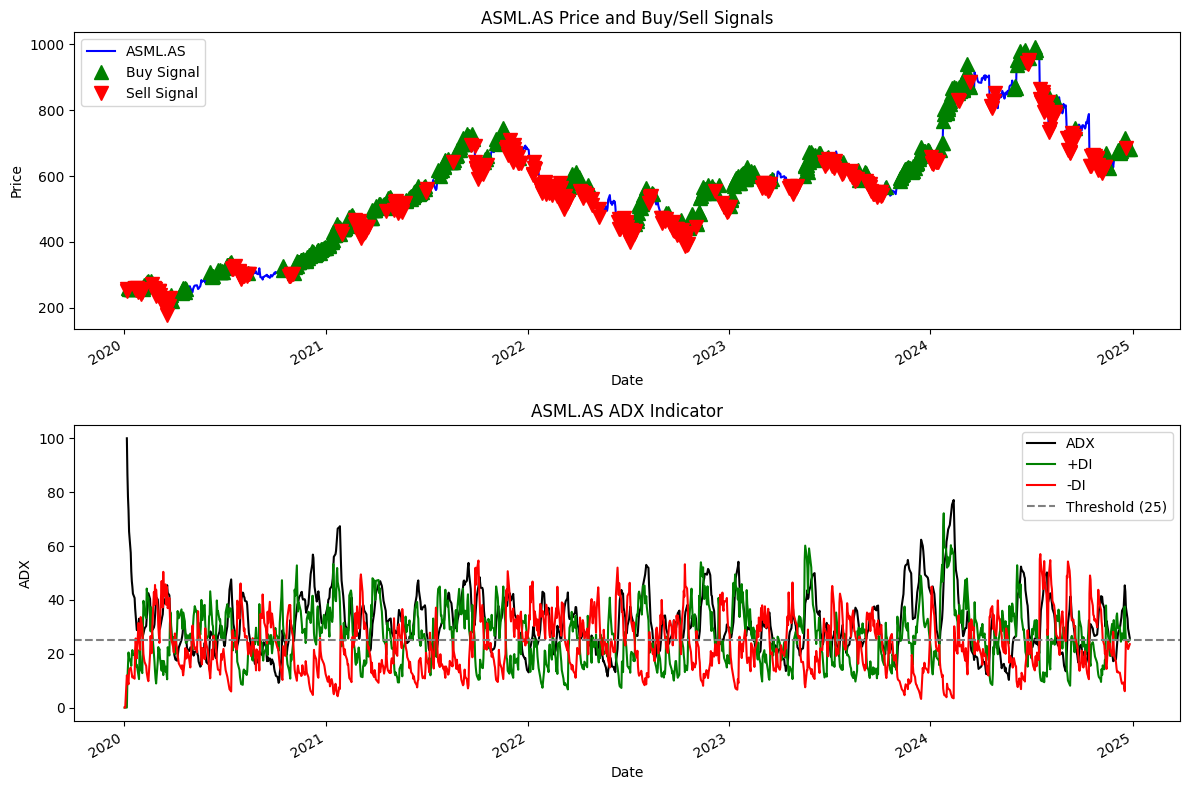

In [51]:
# ADX (Average Directional Movement Index)
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Download historical data for ASML
ticker = "ASML.AS"
df = yf.download(ticker, start="2020-01-01", end="2024-12-30")

def calculate_ADX(df, n=14):
    # Calculate True Range (TR), +DM, and -DM
    df['H-L'] = df['High'] - df['Low']
    df['H-PC'] = abs(df['High'] - df['Close'].shift(1))
    df['L-PC'] = abs(df['Low'] - df['Close'].shift(1))

    df['TR'] = df[['H-L', 'H-PC', 'L-PC']].max(axis=1)
    df['+DM'] = np.where((df['High'] > df['High'].shift(1)), df['High'] - df['High'].shift(1), 0)
    df['-DM'] = np.where((df['Low'] < df['Low'].shift(1)), df['Low'].shift(1) - df['Low'], 0)

    # Smooth the TR, +DM, and -DM using an exponential moving average (EMA)
    df['TRn'] = df['TR'].ewm(span=n, adjust=False).mean()
    df['+DMn'] = df['+DM'].ewm(span=n, adjust=False).mean()
    df['-DMn'] = df['-DM'].ewm(span=n, adjust=False).mean()

    # Calculate +DI, -DI, and DX
    df['+DI'] = 100 * (df['+DMn'] / df['TRn'])
    df['-DI'] = 100 * (df['-DMn'] / df['TRn'])
    df['DIdiff'] = abs(df['+DI'] - df['-DI'])
    df['DIsum'] = df['+DI'] + df['-DI']
    df['DX'] = 100 * (df['DIdiff'] / df['DIsum'])

    # Calculate ADX using EMA
    df['ADX'] = df['DX'].ewm(span=n, adjust=False).mean()

    return df

# Calculate ADX
df = calculate_ADX(df, 14)

# Generate buy/sell signals based on ADX and directional indicators
df['signal'] = 0
df.loc[(df['ADX'] > 25) & (df['+DI'] > df['-DI']), 'signal'] = 1   # Buy Signal
df.loc[(df['ADX'] > 25) & (df['-DI'] > df['+DI']), 'signal'] = -1  # Sell Signal

# Define buy and sell signal points
df['buy_signal'] = df['signal'] == 1
df['sell_signal'] = df['signal'] == -1

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df['ADX'], label="ADX", color="black")
plt.axhline(y=25, color="gray", linestyle="--", label="Threshold (25)")
plt.title(f"ADX Indicator for {ticker}")
plt.legend()
plt.show()

# Print the latest signals
print(df[['Close', 'ADX', '+DI', '-DI', 'signal']].tail(10))

# Plotting buy/sell signals
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 8))

# Plot the closing price
df['Close'].plot(ax=ax1, label='Close Price', color='blue')
ax1.set_ylabel('Price')
ax1.set_title(f"{ticker} Price and Buy/Sell Signals")

# Plot the entry and exit points
ax1.plot(df[df['buy_signal']].index, df['Close'][df['buy_signal']], '^', markersize=10, color='green', label='Buy Signal')
ax1.plot(df[df['sell_signal']].index, df['Close'][df['sell_signal']], 'v', markersize=10, color='red', label='Sell Signal')

ax1.legend()

# Plot the ADX, +DI, -DI
df['ADX'].plot(ax=ax2, color='black', label='ADX')
df['+DI'].plot(ax=ax2, color='green', label='+DI')
df['-DI'].plot(ax=ax2, color='red', label='-DI')
ax2.axhline(25, color='gray', linestyle="--", label="Threshold (25)")

ax2.set_ylabel('ADX')
ax2.set_title(f"{ticker} ADX Indicator")
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()



[*********************100%***********************]  1 of 1 completed


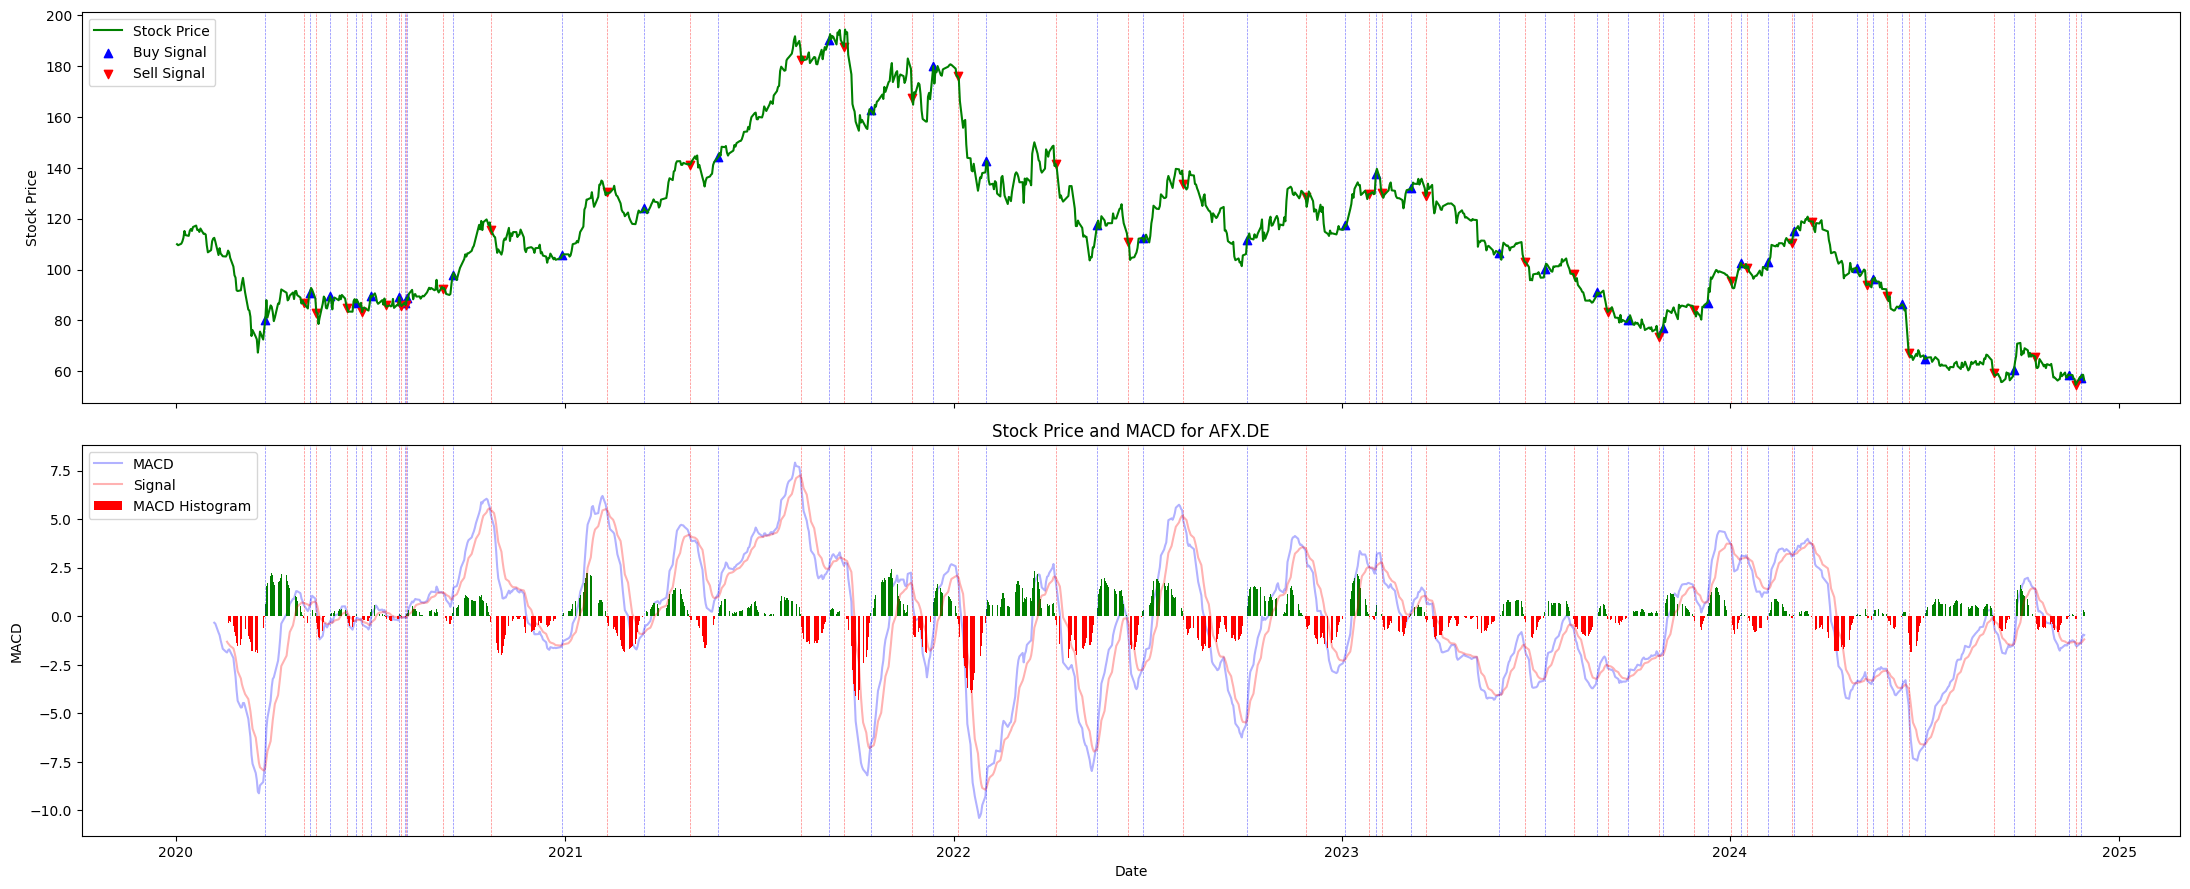

In [47]:
# MACD
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from ta.trend import MACD

def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def plot_macd_signals(dates, prices, macd_line, signal_line, macd_histogram, ticker):
    buy_signals = (macd_line > signal_line) & (macd_line.shift(1) <= signal_line.shift(1))
    sell_signals = (macd_line < signal_line) & (macd_line.shift(1) >= signal_line.shift(1))

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 9), sharex=True)

    ax1.plot(dates, prices, color='g', label='Stock Price', zorder=3)
    ax1.scatter(dates[buy_signals], prices[buy_signals], marker='^', color='b', label='Buy Signal')
    ax1.scatter(dates[sell_signals], prices[sell_signals], marker='v', color='r', label='Sell Signal')
    for date in dates[buy_signals]:
        ax1.axvline(date, color='b', alpha=0.5, linestyle='--', linewidth=0.5)
    for date in dates[sell_signals]:
        ax1.axvline(date, color='r', alpha=0.5, linestyle='--', linewidth=0.5)
    ax1.set_ylabel('Stock Price')
    ax1.legend(loc='upper left')

    ax2.plot(dates, macd_line, label='MACD', color='b', alpha=0.3, zorder=1)
    ax2.plot(dates, signal_line, label='Signal', color='r', alpha=0.3, zorder=2)
    ax2.bar(dates, macd_histogram, label='MACD Histogram', color=np.where(macd_histogram > 0, 'g', 'r'))
    for date in dates[buy_signals]:
        ax2.axvline(date, color='b', alpha=0.5, linestyle='--', linewidth=0.5)
    for date in dates[sell_signals]:
        ax2.axvline(date, color='r', alpha=0.5, linestyle='--', linewidth=0.5)
    ax2.set_ylabel('MACD')
    ax2.legend(loc='upper left')

    plt.title(f'Stock Price and MACD for {ticker}')
    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()

# Define parameters
ticker = "AFX.DE"
start_date = "2020-01-01"
end_date = "2024-12-02"

# Fetch data
stock_data = fetch_stock_data(ticker, start_date, end_date)

# Ensure Close prices are in correct format
prices = stock_data['Close'].squeeze().dropna()  # Ensure 1D and remove NaNs

# Compute MACD
macd_indicator = MACD(prices)
macd_line = macd_indicator.macd()
signal_line = macd_indicator.macd_signal()
macd_histogram = macd_indicator.macd_diff()

# Plot signals
plot_macd_signals(prices.index, prices, macd_line, signal_line, macd_histogram, ticker)


[*********************100%***********************]  1 of 1 completed


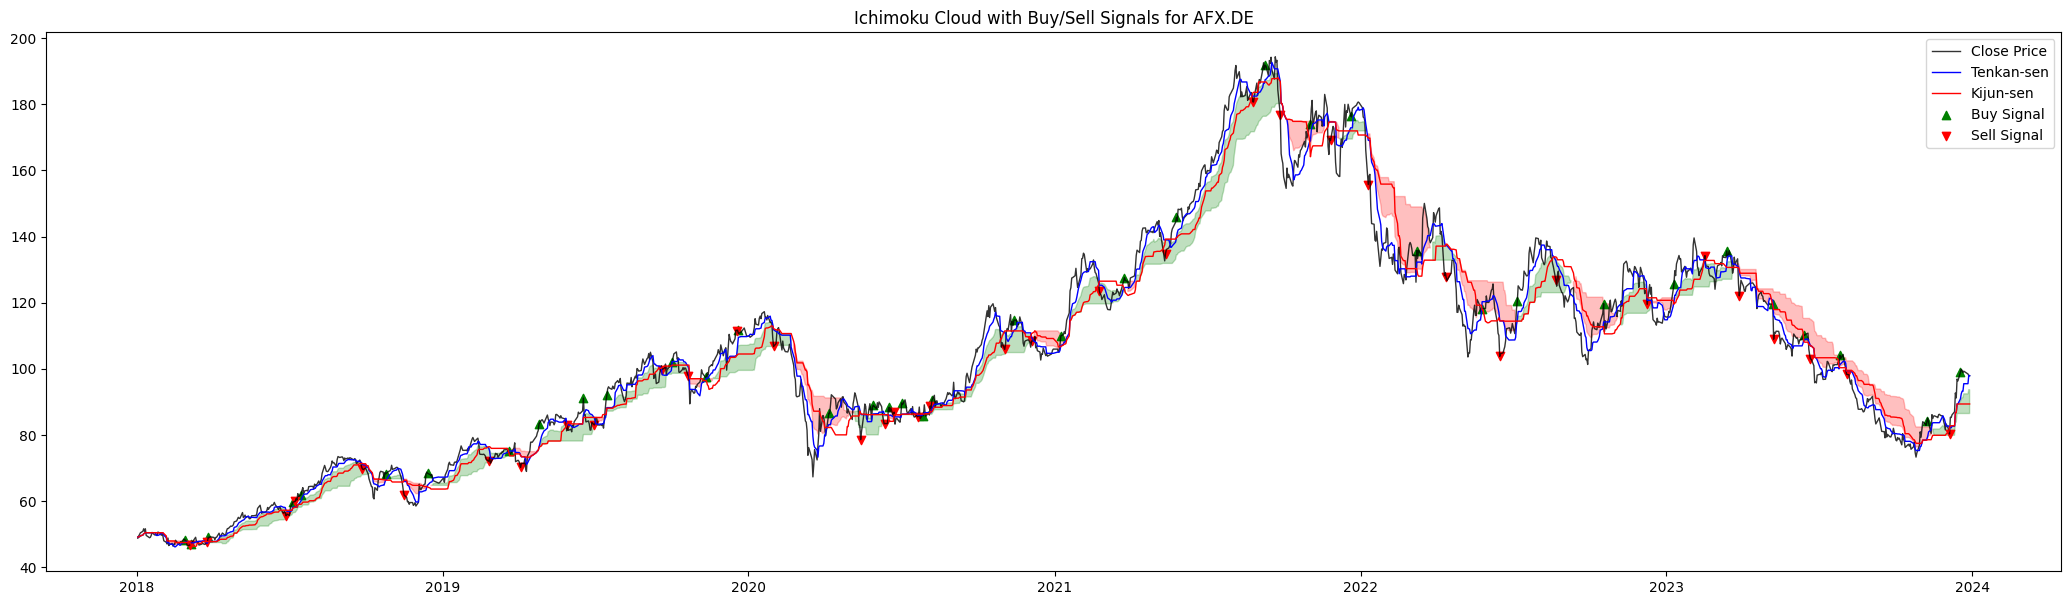

In [48]:
# Ichimoku Cloud
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta.trend as trend

# Download stock data
symbol = "AFX.DE"
start_date = "2018-01-01"
end_date = "2023-12-30"
data = yf.download(symbol, start=start_date, end=end_date)

# Ensure high and low are Series
high_prices = data["High"].squeeze()
low_prices = data["Low"].squeeze()

# Compute Ichimoku Cloud
ichimoku = trend.IchimokuIndicator(high=high_prices, low=low_prices, window1=9, window2=26, window3=52, fillna=True)
data["tenkan_sen"] = ichimoku.ichimoku_conversion_line().squeeze()
data["kijun_sen"] = ichimoku.ichimoku_base_line().squeeze()
data["senkou_span_a"] = ichimoku.ichimoku_a().squeeze()
data["senkou_span_b"] = ichimoku.ichimoku_b().squeeze()

# Find buy and sell signals
data["signal"] = np.where(data["tenkan_sen"] > data["kijun_sen"], 1, 0)
data["cross"] = data["signal"].diff()

buy_signals = data[data["cross"] == 1]
sell_signals = data[data["cross"] == -1]

# Plot Ichimoku Cloud with buy and sell signals
plt.figure(figsize=(26, 7))
plt.plot(data["Close"], label="Close Price", linewidth=1, color="black", alpha=0.8)
plt.plot(data["tenkan_sen"], label="Tenkan-sen", linewidth=1, color="blue")
plt.plot(data["kijun_sen"], label="Kijun-sen", linewidth=1, color="red")

plt.fill_between(
    data.index,
    data["senkou_span_a"],
    data["senkou_span_b"],
    where=(data["senkou_span_a"] >= data["senkou_span_b"]),
    color="green",
    alpha=0.25,
)
plt.fill_between(
    data.index,
    data["senkou_span_a"],
    data["senkou_span_b"],
    where=(data["senkou_span_a"] < data["senkou_span_b"]),
    color="red",
    alpha=0.25,
)

# Plot buy and sell signals
plt.scatter(buy_signals.index, data.loc[buy_signals.index, "Close"], marker="^", color="green", label="Buy Signal")
plt.scatter(sell_signals.index, data.loc[sell_signals.index, "Close"], marker="v", color="red", label="Sell Signal")

plt.title(f"Ichimoku Cloud with Buy/Sell Signals for {symbol}")
plt.legend()
plt.show()
